# Homework Assignment #4 (Individual)
## Regression and SVM Predictive Models

### <p style="text-align: right;"> &#9989; Erin Syerson</p>
### <p style="text-align: right;"> &#9989; esyerson</p>

### Goal for this homework assignment
By now, you have learned a bit about predictive models. In this assignment, you will practice:

* Building predictive models using `statsmodels` and `sklearn`
* Evaluating your predictive models

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, April 21st.** It should be uploaded into the "Homework Assignments" submission folder for Homework #4.  Submission instructions can be found at the end of the notebook.


---
## Part 0: Add to your Git repository to track your progress on your assignment (4 points)

For this assignment, you're going to add it to the `cmse202-s23-turnin` repository you created in class so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s23-turnin` repository and create a new directory called `hw-04`.
2. Move this notebook into that **new directory** in your repository, then **add it and commit it to your repository**.
1. Finally, to test that everything is working, "git push" the file so that it ends up in your GitHub repository.

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s23-turnin`" repository inside the `hw-04` directory that you just created.  Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.

&#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below.

`git clone https://github.com/esyerson/CMSE202-s23-turnin`

# Building a Model to Predict if it Will Rain Tomorrow

In this dataset we have weather data for a number of Australian cities. We’re going to **build a model that uses data from today to predict if it will rain tomorrow.** To simplify our model, let’s just look at the weather for one city.

## Part 1. Working with the Data

The dataset that we’ll be using can be found here:
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW4/aussie_weather_data.csv`

#### 1.1 (3 Points)
**Download the data set and read it in using Pandas.**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
#Write your code here
weather = pd.read_csv('aussie_weather_data.csv', delimiter = ',')
weather

,Year,Month,DayOfMonth,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2009,1,1,NorfolkIsland,20.4,25.8,0.0,6.0,12.4,112.5,...,84.0,71.0,1014.5,1013.6,3.0,1.0,23.3,24.7,0,0
1,2009,1,2,NorfolkIsland,20.9,26.7,0.2,8.0,10.3,90.0,...,79.0,77.0,1016.3,1015.5,2.0,5.0,25.0,25.1,0,0
2,2009,1,3,NorfolkIsland,22.3,26.3,0.0,3.2,2.0,0.0,...,87.0,90.0,1014.6,1014.3,7.0,7.0,24.7,23.8,0,1
3,2009,1,4,NorfolkIsland,21.6,22.2,1.2,2.8,0.0,337.5,...,92.0,95.0,1016.0,1015.3,8.0,8.0,22.1,21.2,1,1
4,2009,1,5,NorfolkIsland,20.4,23.5,2.6,2.2,2.9,337.5,...,86.0,86.0,1015.3,1013.7,7.0,7.0,21.8,21.6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39510,2017,6,20,Darwin,19.3,33.4,0.0,6.0,11.0,22.5,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
39511,2017,6,21,Darwin,21.2,32.6,0.0,7.6,8.6,0.0,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
39512,2017,6,22,Darwin,20.7,32.8,0.0,5.6,11.0,0.0,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
39513,2017,6,23,Darwin,19.5,31.8,0.0,6.2,10.6,337.5,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


#### 1.2 (3 Points)
This dataset has weather information for multiple cities in Australia. It’s quite a large dataset. In fact, it’s a little *too* large for our purposes; it will take a considerable amount of time to train a model on so much data. So we’ll just work with the data for a specific city.

The first thing we’ll do is see which cities we have data for. 
**Print out a list of the specific cities in this dataset.** (Note that this is not the same as printing the entire `Location` column.)

In [3]:
#Write your code here
cities = weather['Location'].unique()
print(cities)

['NorfolkIsland' 'SydneyAirport' 'WaggaWagga' 'MelbourneAirport' 'Mildura'
 'Watsonia' 'Brisbane' 'Cairns' 'Townsville' 'MountGambier' 'Nuriootpa'
 'PerthAirport' 'Perth' 'AliceSprings' 'Darwin']


#### 1.3 (3 Points)
Select one of the cities (and **please** don't just pick the first one!). Cut down your dataframe so that it only contains data from your chosen city. You should also **look through the columns in this dataset and ensure that all of the data is ready for our analysis/model creation.**

In [4]:
#Write your code here
mildura = weather[weather['Location'] == 'Mildura']
mildura

,Year,Month,DayOfMonth,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
10679,2009,1,1,Mildura,13.8,27.4,0.0,9.6,12.6,247.5,...,51.0,24.0,1009.8,1008.5,6.0,1.0,19.2,26.0,0,0
10680,2009,1,3,Mildura,10.6,28.6,0.0,9.2,13.6,337.5,...,39.0,18.0,1019.2,1016.0,0.0,1.0,17.0,27.1,0,0
10681,2009,1,4,Mildura,13.2,34.5,0.0,8.8,13.5,112.5,...,24.0,9.0,1014.2,1012.1,2.0,2.0,24.1,32.8,0,0
10682,2009,1,5,Mildura,16.5,37.3,0.0,10.4,13.4,202.5,...,37.0,7.0,1013.7,1010.8,1.0,1.0,23.7,35.6,0,0
10683,2009,1,6,Mildura,15.7,39.2,0.0,13.4,13.4,180.0,...,34.0,6.0,1011.8,1007.7,0.0,0.0,23.3,37.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13268,2017,6,17,Mildura,9.6,13.7,1.0,0.6,1.0,157.5,...,99.0,87.0,1026.9,1025.7,8.0,8.0,10.4,13.3,0,0
13269,2017,6,18,Mildura,1.7,14.4,0.4,0.2,2.4,247.5,...,100.0,92.0,1031.1,1030.5,0.0,0.0,5.5,12.5,0,0
13270,2017,6,20,Mildura,1.1,17.9,0.2,1.4,7.4,90.0,...,100.0,50.0,1029.4,1026.8,0.0,0.0,6.0,17.3,0,0
13271,2017,6,22,Mildura,-0.5,16.7,0.0,1.4,7.0,45.0,...,99.0,51.0,1028.2,1024.4,7.0,1.0,3.8,16.1,0,0


#### 1.4 (3 Points)
Finally, before we start creating our models, let's first split our data into training and testing datasets. **Keep in mind what we want our model to predict and how this dataset gives you the information you need for your model.**

In [5]:
# Write your code here
# we don't need the location column anymore
mildura = mildura.drop('Location', axis = 1)
mildura

train_vectors, test_vectors, train_labels, test_labels = train_test_split(mildura.iloc[:, :-1], mildura.iloc[:, -1], test_size = 0.25)
print(len(train_vectors), len(train_labels))
print(len(test_vectors), len(test_labels))

1945 1945
649 649


In [6]:
train_vectors

,Year,Month,DayOfMonth,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
10692,2009,1,15,16.4,29.7,0.0,21.0,11.8,270.0,52.0,...,20.0,51.0,23.0,1016.8,1015.8,4.0,4.0,18.4,25.9,0
11271,2010,9,21,10.1,18.4,0.0,2.6,6.3,292.5,30.0,...,20.0,71.0,53.0,1028.9,1026.5,8.0,0.0,13.2,17.5,0
11695,2012,1,6,14.0,29.8,0.0,11.4,12.5,292.5,33.0,...,9.0,44.0,17.0,1017.7,1012.9,1.0,7.0,18.2,28.1,0
12788,2015,6,24,8.2,16.2,0.0,2.2,5.5,202.5,30.0,...,15.0,92.0,62.0,1022.0,1022.1,8.0,5.0,9.2,16.0,0
12611,2014,12,6,16.0,27.7,0.2,10.8,9.5,225.0,46.0,...,19.0,64.0,43.0,1008.5,1006.3,7.0,6.0,18.5,23.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13060,2016,6,6,8.0,17.7,0.4,0.4,6.7,180.0,44.0,...,20.0,83.0,70.0,1006.3,1005.2,1.0,3.0,11.7,15.0,0
11881,2012,7,22,4.7,17.8,0.0,1.4,6.2,337.5,30.0,...,17.0,100.0,48.0,1033.5,1030.1,6.0,5.0,7.1,16.4,0
13253,2017,5,19,10.8,17.8,6.6,0.2,0.8,45.0,24.0,...,11.0,100.0,79.0,1018.0,1014.6,8.0,6.0,12.2,16.8,1
10811,2009,5,16,13.3,19.5,0.0,4.8,5.3,180.0,43.0,...,20.0,82.0,54.0,1018.1,1017.5,7.0,6.0,15.1,19.3,0


## 2.0 Building a Regression Model

#### 2.1 (3 Points)
We’ll start by creating a regression model. **Does it make sense for us to use linear regression or logistic regression? Explain your choice.**

<font color='green'>**A logistic regression would make more sense because the question is to figure out if it rains tomorrow using data from today. That is a classification of whether or not it rains, using categorical data. we are not trying to find a relationship between continuous sets of data, so a linear regression would not make as much sense.**</font>

#### 2.2 (12 Points)
Create a regression model. Use the model summary to determine which parameters are most statistically significant in your model. If you get an error during at this stage it may be helpful to go back to part 1.3 and ensure that all of your data is appropriate for creating a model. 

In [7]:
logit_model = sm.Logit(train_labels, train_vectors).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.183788
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:           RainTomorrow   No. Observations:                 1945
Model:                          Logit   Df Residuals:                     1922
Method:                           MLE   Df Model:                           22
Date:                Thu, 20 Apr 2023   Pseudo R-squ.:                  0.4746
Time:                        22:31:47   Log-Likelihood:                -357.47
converged:                       True   LL-Null:                       -680.32
Covariance Type:            nonrobust   LLR p-value:                2.131e-122
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Year              0.0226      0.010      2.159      0.031       0.002       0.043
Month             0.

<font color='green'>**the following variables are the most important: Sunshine, WindGustSpeed, Humidity3pm, Pressure9am, and Pressure3pm. I determined this by looking at the p values listed above, the lower p values coorespond to the more important variables. I determined that the variables with a p value of 0.000 would be the most important).**</font>

#### 2.3 (8 Points)
**Fit your test data and create/print a confusion matrix. We’ll use this to evaluate how well your predicitve model performs.**

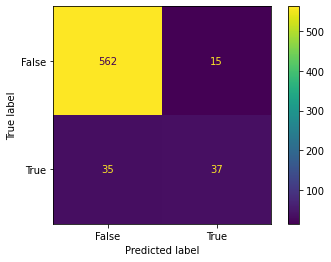

In [8]:
#Write your code here

prediction = list(map(round, logit_model.predict(test_vectors)))
conf_mat = metrics.confusion_matrix(test_labels, prediction)
conf_mat_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
conf_mat_disp.plot()


#### 2.4 (3 Points)
Look at/calculate the Precision and Recall of your model. **Which one is greater? Describe in plain language what that means about the performance of your model (I.e., the circumstances in which it does/doesn’t do well).**

In [9]:
true_pos = conf_mat[1, 1]
false_pos = conf_mat[0, 1]
true_neg = conf_mat[0, 0]
false_neg = conf_mat[1, 0]

precision = true_pos / (true_pos + false_pos)
recall = true_pos / (true_pos + false_neg)
accuracy = (true_pos + true_neg) / np.sum(np.sum(conf_mat))

print('precision:', precision, '\nrecall:', recall, '\naccuracy:', accuracy)

precision: 0.7115384615384616 
recall: 0.5138888888888888 
accuracy: 0.9229583975346687


<font color='green'>**The precision is greater. This means that the number of false positives is lower than the number of false negatives.**</font>

<font color='green'>**The accuracy of the model is pretty high, this means that for practical applications, the model is correct most of the time, but when it is wrong, it is more likely to be a false negative than a false positive. Meaning that the model is saying it won't rain but it actually does more times than the model says it will rain but it actually doesn't. These false predictions can be more detremental than the other depending on what an idividual relies more on. If someone depended more on knowing when it won't rain, then this false prediction would be more detremental than if the model said it would rain but didn't. The opposite case would be true if someone relied more on knowing when it would rain.**</font>

## 3.0 Interlude: A Base Rate Frequency Model (12 Points)

If we didn't create a fancy model for predicting future rainfall, would that mean that we had *no way* of predicting if it would rain? Of course not. There's always *some* kind of model we can use (they just won't be very sophisticated). 

In the case of our problem--predicting whether it will rain tomorrow--what is the simplest model we could use? We'd need to look at the **base rate frequency**. If we know that, over the course of the year, it rains ~30% of the time, that would be our base rate frequency. If we were to guess that it would be sunny every day of the year, we'd be wrong ~30% of the time, *but we'd be right ~70% of the time.* 

Why is this important? Imagine we create a sophisticated model that accurately predicts rain/no rain ~60% of the time; without any other information, we might think, "That's not too bad, I guess." It certainly feels better than *no* information, right? Now think about the base rate frequency model, which achieves an accuracy of **70%** just by guessing the same thing every time. Suddenly, our sophisticated model seems like crap! It tells us we could be doing ~10% better than our fancy model by guessing. This is why we use the base rate frequency as a simple way to test our models.


**Calculate how frequently it rains in your city. If you were to guess that it *wasn't* going to rain every day, how frequently would you be right? (We'll use this as our baseline model.)**


In [10]:
#Write your code for calculating the frequency of rain here.
rain_tot = np.sum(mildura['RainTomorrow'])
rain_freq = rain_tot / len(mildura['RainTomorrow'])
rain_freq

0.11141094834232845

<font color='green'>**in the Mildura data, it rains about 11.1% of the time. This means that if we guess that it *won't* rain everyday, then we would be right about 88.9% of the time.**</font>

---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

## 4.0 SVM Model

We’ve seen how regression faired in predicting rain; now let’s give Support Vector Machines a shot. 

It’s not clear, *a priori*, which type of kernel (linear or RBF) would fair better. Therefore, we’ll need to test out both kernel types, as well as multiple values for hyperparameters ($C$ and $\gamma$). 

#### 4.1 (12 Points)
Run a grid search over both types of kernels and multiple values of $C$ and $\gamma$ (we recommend [0.01,0.1,1.0,10.0] for both). We *STRONGLY* recommend you set the parameter `n_jobs=-1` in `GridSearchCV`, which will distribute the computational load. Make sure to write down your best-fit hyperparameters. 

In [11]:
#Write your code here

start = time.time()

#make some temporary variables so you can change this easily
tmp_vectors = train_vectors
tmp_labels = train_labels

print("Fitting the classifier to the training set")
# a dictionary of hyperparameters: key is the name of the parameter, value is a list of values to test
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
              'gamma': [0.01, 0.1, 1.0, 10.0],
              'kernel': ['linear','rbf']}
# make a classifier by searching over a classifier and the parameter grid
clf = GridSearchCV(SVC(class_weight='balanced'), param_grid, n_jobs = -1)

# we have a "good" classifier (according to GridSearchCV), how's it look
clf = clf.fit(train_vectors, train_labels)
print("Best estimator found by grid search:")
print(clf.best_estimator_)
print("Best parameters found by grid search:")
print(clf.best_params_)

end = time.time()
print("Runtime",end - start)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=0.01, class_weight='balanced', gamma=0.01)
Best parameters found by grid search:
{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
Runtime 19.123751163482666


<font color='green'>**The best fit hyperparameters are for the RBF kernel, $C = 0.1$ and $\gamma = 0.01$**</font>

#### 4.2 (8 Points)
Using your best-fit parameters, classify your test data and print off the confusion matrix. Note/calculate the Precision and Recall for your SVM model, as well as the overall accuracy.

$\mathrm{Accuracy} = \frac{\mathrm{Accurate~Predictions}}{\mathrm{Total~Samples}}$.

Predicting names on the test set


/home/syersone/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/syersone/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/syersone/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94       577
           1       0.00      0.00      0.00        72

    accuracy                           0.89       649
   macro avg       0.44      0.50      0.47       649
weighted avg       0.79      0.89      0.84       649



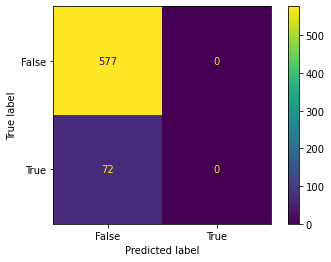

In [13]:
#Write your code here

print("Predicting names on the test set")

pred_labels = clf.predict(test_vectors)
pred_labels
np.sum(test_labels)/len(test_labels)
print(classification_report(test_labels, pred_labels))
conf_mat = confusion_matrix(test_labels, pred_labels)
conf_mat_disp = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
conf_mat_disp.plot()

## 5. Evaluation of Models

Here we’re going to investigate how well our predictive models actually work.


#### 5.1 (5 Points)

Compare the accuracy of both of your predictive models (regression and SVM) to the baseline model from part 3. Do your predictive models do better than the baseline model? Is their performance relative to the baseline model what *you* would expect? 


<font color='green'>**My Logistic Regression model had an accuracy of 92.3%, the SVM model had an accuracy of 89%, and my baseline model had an accuracy of 88.9%**</font>

## CONTINUE THE QUESTION~!!!!! ANSER THE REST 

#### 5.2 (5 Points)

Let’s test the robustness of your model. Before you do anything, you should record the precision, recall, and accuracy of your two predictive models (if you haven’t already). Once you’ve done that, go all the way back to part 1.4 and change the random seed for `train_test_split`. Using this new data split, rerun all of your code from parts 2 and 4. For each new random seed, record the precision, recall, and accuracy for both models (and write them, as well as the random seed, in the cell below!). Do this for 3-5 different random seeds. 


<font color='green'>*Write down the accuracy, precision, recall, and seed number for each of your iterations.*</font>

#### 5.3 (5 Points)

How much variation did you observe in the precision, recall, and accuracy in your models? After going through this exercise, how (if at all) does this change your response to part 5.1? 

<font color='green'>*Write down your response here.*</font>

#### 5.4 (5 Points)

Finally, compare the performance of your regression and SVM models. Which, if any, performed better? Esxplain.

<font color='green'>*Write down your response here.*</font>

---

### &#128721; STOP (3 Point)
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### Congratulations, you're done!

&#169; Copyright 2022,  Department of Computational Mathematics, Science and Engineering at Michigan State University